# Notebook 2 (EDA)

### Content
- Import libraries
- Top words in both Starbucks and DunkinDonuts dataframes
- Visualization of Word count (Barchart and wordcloud)
- Visualization of distribution of Word count in title
- Merging and Exporting Data

#### Import Libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
    
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer # RegexpTokenizer uses regex for tokenization
from nltk.stem import WordNetLemmatizer # for lemmatization
from nltk.stem.porter import PorterStemmer # for stemming
from nltk.corpus import stopwords # for stopwords removal
from nltk.sentiment.vader import SentimentIntensityAnalyzer # analyze sentiments using Vader library (implemented from technical paper)
import re
import nltk
from nltk.probability import FreqDist

from sklearn.model_selection import train_test_split, GridSearchCV # split our data and run hyperparameter search
from sklearn.pipeline import Pipeline # to compactly pack multiple modeling operations
from sklearn.naive_bayes import MultinomialNB # to build our classification model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # to access results from binary classification task (you may also import other specific classification metrics)
from sklearn.metrics import accuracy_score # for model performance assessment

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text

In [2]:
data_sb = pd.read_csv('data/data_starbucks.csv')
data_dd = pd.read_csv('data/data_DunkinDonuts.csv')

In [3]:
print(data_sb.shape)
data_sb.head()

(4999, 3)


,subreddit,selftext,title
0,starbucks,NaN,My new favorite 50 stars drink! Caffe misto wi...
1,starbucks,"I’m like all for partners getting first dibs, ...",How does your store handle partners buying mer...
2,starbucks,2 of us on shift.. a full cafe and queue to th...,8am.. 🤦🏻‍♀️
3,starbucks,My area stores only have clearly straight male...,Looking for the gay male baristas?
4,starbucks,Yes it’s a cafe order and yes I watched her si...,Reasons why I hate my job.


In [4]:
data_sb = data_sb[['title','subreddit']]
data_dd = data_dd[['title','subreddit']]

In [5]:
data_sb.head()

,title,subreddit
0,My new favorite 50 stars drink! Caffe misto wi...,starbucks
1,How does your store handle partners buying mer...,starbucks
2,8am.. 🤦🏻‍♀️,starbucks
3,Looking for the gay male baristas?,starbucks
4,Reasons why I hate my job.,starbucks


In [6]:
data_dd.head()

,title,subreddit
0,Most of FL probably won’t get to redeem the fr...,DunkinDonuts
1,First angry customer :(,DunkinDonuts
2,Any way to increase # of pumps in app?,DunkinDonuts
3,‘tis the spooky season,DunkinDonuts
4,Interview soon,DunkinDonuts


In [7]:
data_sb.isnull().sum()

title        0
subreddit    0
dtype: int64

In [8]:
data_dd.isnull().sum()

title        0
subreddit    0
dtype: int64

### Checking for the top words in both Starbucks and DunkinDonuts dataframes

#### Common words (unigrams)

In [9]:
cvec = CountVectorizer(stop_words='english', ngram_range = (1,1))

sb_cvec = cvec.fit_transform(data_sb['title'])
sb_cvec = pd.DataFrame(sb_cvec.toarray(),
                       columns = cvec.get_feature_names_out())
sb_top_words = sb_cvec.sum().sort_values(ascending=False)
sb_top_20 = sb_top_words.head(20)

In [10]:
dd_cvec = cvec.fit_transform(data_dd['title'])
dd_cvec = pd.DataFrame(dd_cvec.toarray(),
                       columns = cvec.get_feature_names_out())
dd_top_words = dd_cvec.sum().sort_values(ascending=False)
dd_top_20 = dd_top_words.head(20)

Text(0.5, 0, 'Word Count')

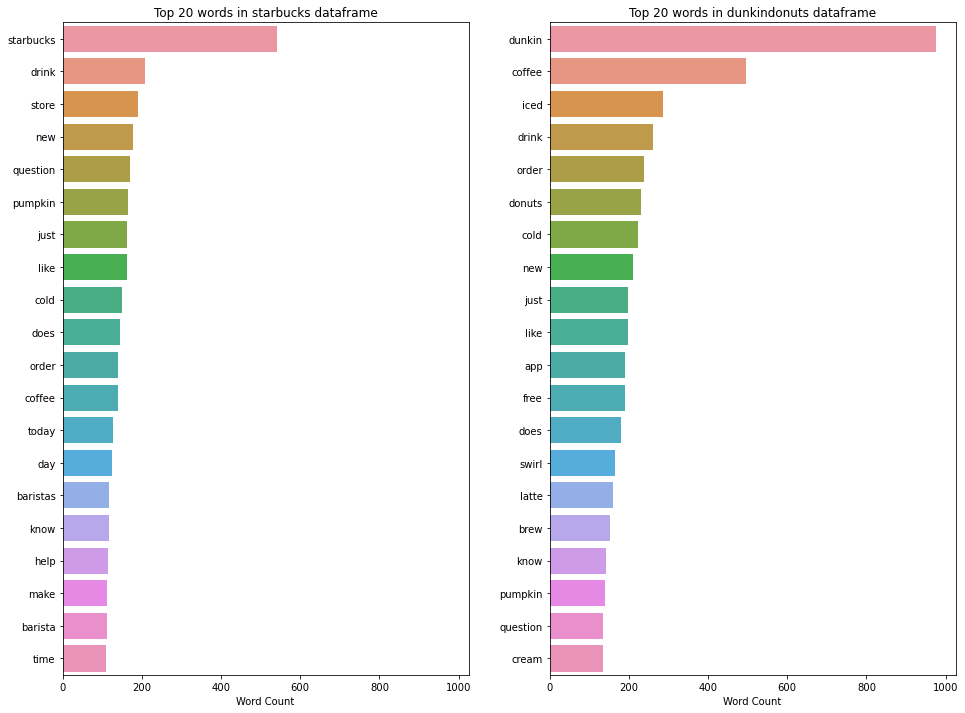

In [11]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,12), sharex = True)
                      
sns.barplot( x=sb_top_20, y=sb_top_20.index.values,ax=ax[0])
ax[0].set_title('Top 20 words in starbucks dataframe')
ax[0].set_xlabel('Word Count')               
sns.barplot( x=dd_top_60, y=dd_top_60.index.values,ax=ax[1])
ax[1].set_title('Top 20 words in dunkindonuts dataframe')
ax[1].set_xlabel('Word Count')  

#### Observations:
- The word 'coffee' is mentioned alot less for starbucks as compared to Dunkin Donuts, despite starbucks being prided for being the largest coffee shop chain in the world
- Words like 'pumpkin', 'new' are appearing at the top signifying that there are indeed buzz generated through reddit for their halloween themed flavours as of the time of this project, October 22.

#### Now check for bigrams

In [12]:
cvec = CountVectorizer(stop_words='english', ngram_range = (2,2))

sb_cvec = cvec.fit_transform(data_sb['title'])
sb_cvec = pd.DataFrame(sb_cvec.toarray(),
                       columns = cvec.get_feature_names_out())
sb_top_words = sb_cvec.sum().sort_values(ascending=False)
sb_top_60 = sb_top_words.head(20)

In [13]:
dd_cvec = cvec.fit_transform(data_dd['title'])
dd_cvec = pd.DataFrame(dd_cvec.toarray(),
                       columns = cvec.get_feature_names_out())
dd_top_words = dd_cvec.sum().sort_values(ascending=False)
dd_top_60 = dd_top_words.head(20)

Text(0.5, 0, 'Word Count')

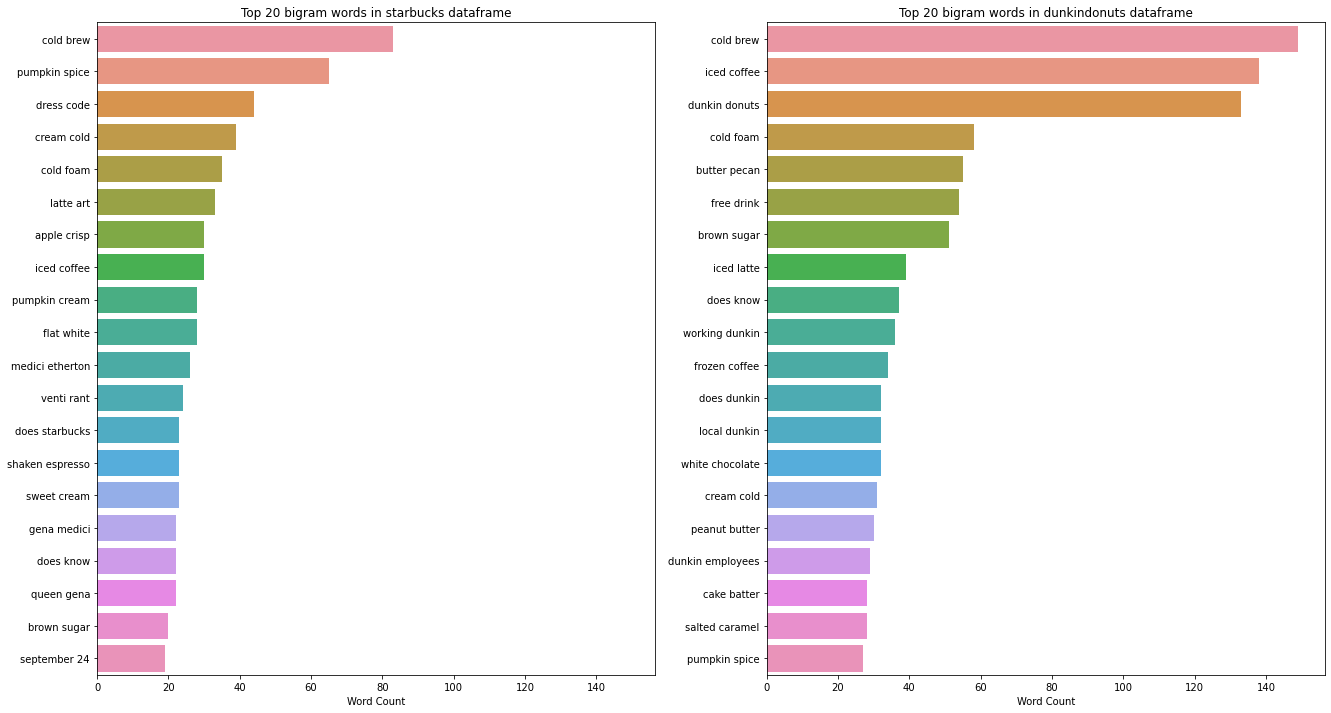

In [14]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (22,12), sharex = True)
                      
sns.barplot( x=sb_top_60, y=sb_top_60.index.values,ax=ax[0])
ax[0].set_title('Top 20 bigram words in starbucks dataframe')
ax[0].set_xlabel('Word Count')               
sns.barplot( x=dd_top_60, y=dd_top_60.index.values,ax=ax[1])
ax[1].set_title('Top 20 bigram words in dunkindonuts dataframe')
ax[1].set_xlabel('Word Count') 

#### Observations:
- Both coffee chains have 'cold brew' as their top bigram words, signalling that this just might be their most popular product
- Starbucks seasonal drink 'pumpkin spice' is gaining incredible buzz
- 'cold brew', 'iced coffee',' cream cold', 'cold foam' are all bigram words that appeared at the top of both datasets, suggesting that people are enjoying colder beverage this season

### WordCloud for Starbucks

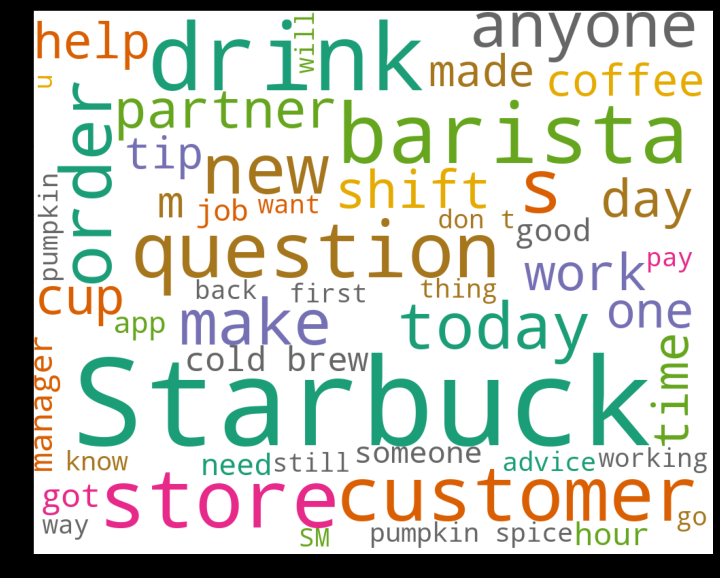

In [15]:
from wordcloud import WordCloud

#Quick check with WordCloud for most prominent words
wc_sb = WordCloud(background_color="white", colormap="Dark2",width=1000, height=800,
               max_words=50, random_state=42).generate(' '.join(data_sb['title'].tolist()))

plt.figure(figsize = (15,10) , facecolor = 'k')
plt.imshow(wc_sb)


#### WordCloud for DunkinDonuts

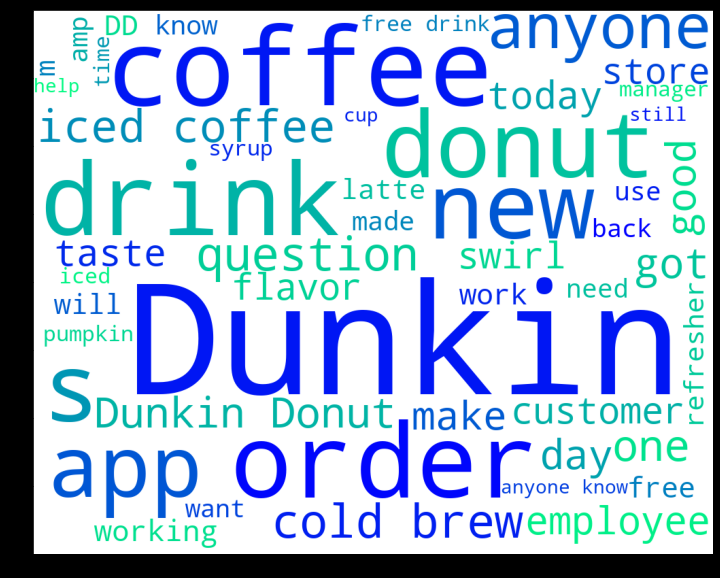

In [16]:
wc_dd = WordCloud(background_color="white", colormap="winter",width=1000, height=800,
               max_words=50, random_state=42).generate(' '.join(data_dd['title'].tolist()))

plt.figure(figsize = (15,10) , facecolor = 'k')
plt.imshow(wc_dd)


Opposed to the barchart above, the wordcloud provide little to no information regarding products by both companies

In [17]:
tokenizer = RegexpTokenizer(r'\w+')
data_sb['words_in_sentence']=data_sb['title'].apply(lambda x: tokenizer.tokenize(x)).apply(len)

data_sb.head()

,title,subreddit,words_in_sentence
0,My new favorite 50 stars drink! Caffe misto wi...,starbucks,23
1,How does your store handle partners buying mer...,starbucks,8
2,8am.. 🤦🏻‍♀️,starbucks,1
3,Looking for the gay male baristas?,starbucks,6
4,Reasons why I hate my job.,starbucks,6


In [18]:
data_sb.describe()

,words_in_sentence
count,4999.000000
mean,8.723345
std,7.586613
min,0.000000
25%,4.000000
50%,7.000000
75%,11.000000
max,68.000000


- mean number of words in each post is 8.723
- minimum word count is 0 words
- maximum word count is 68 words
- median word count is 7 words

In [19]:
data_sb[data_sb['words_in_sentence']==0]

,title,subreddit,words_in_sentence
327,.,starbucks,0
506,😏,starbucks,0
1218,🙂,starbucks,0
1333,.,starbucks,0
2318,⏹,starbucks,0
2373,?????,starbucks,0
3129,🧋🧋,starbucks,0
3215,😐,starbucks,0
3839,🧐,starbucks,0


These post contains no words and can be dropped from our data set as they provides no value for our model performance.

In [20]:
data_sb.drop(labels=[327,506,1218,1333,2318,2373,3129,3215,3839], axis=0, inplace=True)

In [21]:

data_dd['words_in_sentence']=data_dd['title'].apply(lambda x: tokenizer.tokenize(x)).apply(len)

data_dd.head()

,title,subreddit,words_in_sentence
0,Most of FL probably won’t get to redeem the fr...,DunkinDonuts,13
1,First angry customer :(,DunkinDonuts,3
2,Any way to increase # of pumps in app?,DunkinDonuts,8
3,‘tis the spooky season,DunkinDonuts,4
4,Interview soon,DunkinDonuts,2


In [22]:
data_dd.describe()

,words_in_sentence
count,4996.000000
mean,9.363691
std,8.557784
min,0.000000
25%,4.000000
50%,7.000000
75%,11.250000
max,64.000000


- mean number of words in each post is 8.55
- minimum word count in is 0 words
- maximum word count in is 64 words
- median word count is 7 words

In [23]:
data_dd[data_dd['words_in_sentence']==0]

,title,subreddit,words_in_sentence
857,😳,DunkinDonuts,0
922,🤔🤔🤔,DunkinDonuts,0
964,💀💀💀💀,DunkinDonuts,0
1456,🙃,DunkinDonuts,0
1972,👀👀,DunkinDonuts,0
2031,👀👀,DunkinDonuts,0
2069,🥴🤤,DunkinDonuts,0
2670,💀💀,DunkinDonuts,0
3266,💀,DunkinDonuts,0
3404,😳😳😳,DunkinDonuts,0


These post contains no words and can be dropped from our data set.

In [24]:
data_dd.drop(labels=[857,922,964,1456,1972,2031,2069,2670,3266,3404,4371,4377,4406], axis=0, inplace=True)

### Visualization of distribution of Word count in title

/Users/joeltang/mambaforge/envs/dsi-sg/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/joeltang/mambaforge/envs/dsi-sg/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


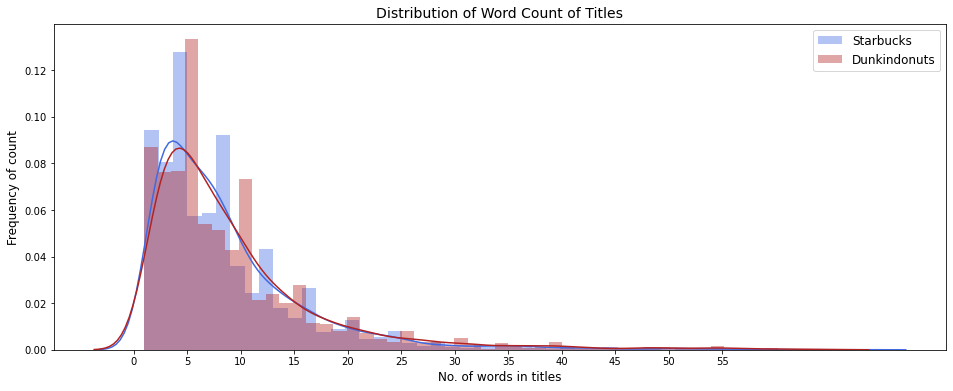

In [25]:
plt.figure(figsize=(16, 6))
sns.distplot(data_sb['words_in_sentence'], label='Starbucks', color='royalblue')
sns.distplot(data_dd['words_in_sentence'], label='Dunkindonuts', color='firebrick')
plt.title('Distribution of Word Count of Titles', fontsize=14)
plt.xlabel('No. of words in titles', fontsize=12)
plt.xticks(range(0, 60, 5))
plt.ylabel('Frequency of count', fontsize=12)
plt.legend(fontsize='large');

- The distribution wordcount in the respective title are right tailed
- Most of the titles are less than 5 words long for both starbucks and dunkin donuts
- The distribution chart is similar for both starbucks and dunkin donts redditors, suggesting that the users of reddit have similar habits of posting their threads


### Merging and Exporting Data

In [26]:
combined_df = pd.concat([data_sb, data_dd], axis = 0)

In [27]:
print(combined_df.shape)
combined_df.head()

(9973, 3)


,title,subreddit,words_in_sentence
0,My new favorite 50 stars drink! Caffe misto wi...,starbucks,23
1,How does your store handle partners buying mer...,starbucks,8
2,8am.. 🤦🏻‍♀️,starbucks,1
3,Looking for the gay male baristas?,starbucks,6
4,Reasons why I hate my job.,starbucks,6


In [28]:
combined_df.to_csv('data/combined_df.csv')